## Aim: determine which features most accurately predict HPV vaccination rates in New York City

In [440]:
import pandas as pd
import numpy as np
from datetime import datetime
from matplotlib import pyplot as plt

%matplotlib inline

In [441]:
# import dataset

url = '/Users/tristanalmada/GA/TrisAlma_GA_DAT_NYC_9_27/Final-Project/HPVdata.csv'
data = pd.read_csv(url, low_memory = False)

# import features

feature_names = pd.read_csv('/Users/tristanalmada/GA/TrisAlma_GA_DAT_NYC_9_27/Final-Project/featureset.csv', low_memory = False)

In [442]:
feature_names.columns

Index([u'Unemployment', u'TrumpSupport', u'Tobaccoretail_rate', u'Teen_Births',
       u'Supermarketarea_rate', u'Sugary_Drink', u'Stroke_Hosp', u'Smoking',
       u'Self_rep_health', u'Schoolabsent_rate', u'Rent_burden',
       u'Racewhite_Rate', u'Raceother_rate', u'Racehispanic_rate',
       u'Raceblack_rate', u'Raceasian_rate', u'Psych_Hosp', u'Preterm_Births',
       u'Premature_Mort', u'Poverty', u'OverallPopulation_rate', u'Obesity',
       u'Nonwhite_rate', u'Ltd_Eng_Prof', u'Life_expectancy_rate',
       u'Late_No_Prenatal', u'Jailincarceration', u'Insurance', u'IMR',
       u'HPV_vaccination', u'Housing_Defects', u'HIV_Testing_Ever',
       u'HIV_Diagnosis', u'Fruit_Veg', u'Foreign_born', u'Flu_Vaccination',
       u'Exercise', u'Eduhsdegreeorsomecollege_rate',
       u'Edudidnotcompletehs_rate', u'Educollegedegreeandhigher_rate',
       u'Drug_Hosp', u'Didnt_Get_Care', u'Diabetes', u'Avoidable_Diabetes',
       u'Avoidable_Asthma', u'Avertabledeaths_rate', u'Asthma_5to14',
 

In [443]:
feature_names.shape

(0, 55)

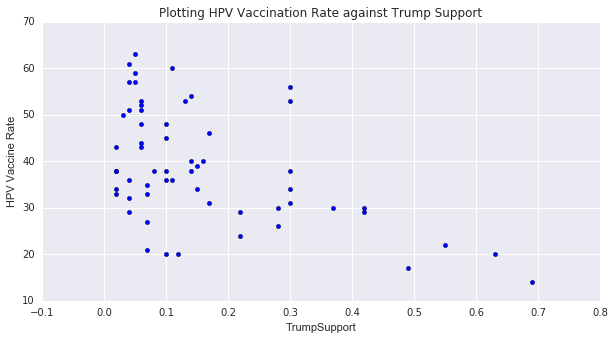

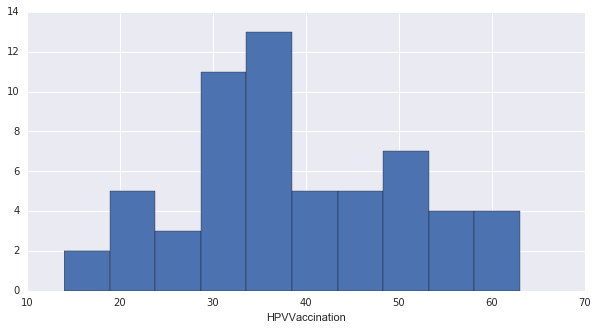

In [600]:
plt.figure(figsize=(10,5))
plt.scatter(data['TrumpSupport'], data['HPV_vaccination'])
plt.title("Plotting HPV Vaccination Rate against Trump Support")
plt.ylabel('HPV Vaccine Rate')
plt.xlabel('TrumpSupport')
plt.show()

data.HPV_vaccination.hist(figsize=(10,5))
plt.xlabel('HPVVaccination')

In [445]:
# clean N/A from the dataframe

data = data.drop(data.index[[59,60,61]])

In [446]:
import statsmodels.api as sm
from sklearn import linear_model, datasets
from sklearn.cross_validation import train_test_split

In [447]:
features = data[['Unemployment','TrumpSupport','Tobaccoretail_rate','Teen_Births',
      'Supermarketarea_rate','Sugary_Drink','Stroke_Hosp','Smoking',
      'Self_rep_health','Schoolabsent_rate','Rent_burden',
      'Racewhite_Rate','Raceother_rate','Racehispanic_rate',
      'Raceblack_rate','Raceasian_rate','Psych_Hosp','Preterm_Births',
      'Premature_Mort','Poverty','OverallPopulation_rate','Obesity',
      'Nonwhite_rate','Ltd_Eng_Prof','Life_expectancy_rate',
      'Late_No_Prenatal','Jailincarceration','Insurance','IMR','Housing_Defects','HIV_Testing_Ever',
      'HIV_Diagnosis','Fruit_Veg','Foreign_born','Flu_Vaccination',
      'Exercise','Eduhsdegreeorsomecollege_rate',
      'Edudidnotcompletehs_rate','Educollegedegreeandhigher_rate',
      'Drug_Hosp','Didnt_Get_Care','Diabetes','Avoidable_Diabetes',
      'Avoidable_Asthma','Asthma_5to14',
      'Assault_Hosps','Alc_Hosp','Airquality_rate','Age65plus_rate',
      'Age45to64_rate','Age25to44_rate','Age18to24_rate',
      'Age0to17_rate']]

In [509]:
all_data = data[['HPV_vaccination','Unemployment','TrumpSupport','Tobaccoretail_rate','Teen_Births',
      'Supermarketarea_rate','Sugary_Drink','Stroke_Hosp','Smoking',
      'Self_rep_health','Schoolabsent_rate','Rent_burden',
      'Racewhite_Rate','Raceother_rate','Racehispanic_rate',
      'Raceblack_rate','Raceasian_rate','Psych_Hosp','Preterm_Births',
      'Premature_Mort','Poverty','OverallPopulation_rate','Obesity',
      'Nonwhite_rate','Ltd_Eng_Prof','Life_expectancy_rate',
      'Late_No_Prenatal','Jailincarceration','Insurance','IMR','Housing_Defects','HIV_Testing_Ever',
      'HIV_Diagnosis','Fruit_Veg','Foreign_born','Flu_Vaccination',
      'Exercise','Eduhsdegreeorsomecollege_rate',
      'Edudidnotcompletehs_rate','Educollegedegreeandhigher_rate',
      'Drug_Hosp','Didnt_Get_Care','Diabetes','Avoidable_Diabetes',
      'Avoidable_Asthma','Asthma_5to14',
      'Assault_Hosps','Alc_Hosp','Airquality_rate','Age65plus_rate',
      'Age45to64_rate','Age25to44_rate','Age18to24_rate',
      'Age0to17_rate']]

In [529]:
all_data.shape

(59, 54)

In [530]:
all_data.describe()

,HPV_vaccination,Unemployment,TrumpSupport,Tobaccoretail_rate,Teen_Births,Supermarketarea_rate,Sugary_Drink,Stroke_Hosp,Smoking,Self_rep_health,...,Avoidable_Asthma,Asthma_5to14,Assault_Hosps,Alc_Hosp,Airquality_rate,Age65plus_rate,Age45to64_rate,Age25to44_rate,Age18to24_rate,Age0to17_rate
count,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,...,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000
mean,38.762712,11.016949,0.161017,11.881356,21.688136,177.305085,27.779661,315.033898,15.762712,77.728814,...,276.813559,34.711864,64.389831,1062.711864,9.188136,12.542373,24.271186,31.915254,10.237288,21.152542
std,12.311109,4.002118,0.157542,7.556876,12.220518,79.510193,7.909113,83.974332,2.973092,7.094997,...,209.387158,26.798128,45.656142,558.781805,1.186575,3.218063,3.010502,6.406592,2.095471,5.683653
min,14.000000,5.000000,0.020000,6.000000,1.100000,69.000000,12.000000,140.000000,10.000000,64.000000,...,46.000000,6.000000,11.000000,233.000000,7.600000,7.000000,17.000000,24.000000,5.000000,7.000000
25%,30.000000,7.500000,0.055000,8.500000,13.750000,118.000000,22.000000,257.000000,13.500000,71.000000,...,119.000000,13.000000,27.000000,641.000000,8.400000,10.000000,22.000000,27.000000,9.000000,18.500000
50%,38.000000,10.000000,0.100000,11.000000,19.800000,164.000000,28.000000,310.000000,16.000000,79.000000,...,218.000000,24.000000,47.000000,881.000000,8.800000,12.000000,24.000000,29.000000,10.000000,22.000000
75%,49.000000,14.500000,0.220000,13.000000,31.100000,222.500000,34.000000,383.500000,18.000000,83.000000,...,359.000000,54.500000,91.500000,1302.000000,9.750000,14.500000,26.000000,34.500000,11.000000,25.000000
max,63.000000,20.000000,0.690000,62.000000,44.900000,450.000000,42.000000,470.000000,22.000000,92.000000,...,786.000000,112.000000,180.000000,2367.000000,14.300000,21.000000,31.000000,50.000000,17.000000,34.000000


In [449]:
feature_set = data[['Unemployment','TrumpSupport','Smoking',
      'Self_rep_health','Rent_burden',
      'Racewhite_Rate','Poverty','Obesity',
      'Ltd_Eng_Prof','Jailincarceration','Insurance','IMR','Housing_Defects',
        'Fruit_Veg','Flu_Vaccination',
      'Edudidnotcompletehs_rate',
      'Drug_Hosp','Age0to17_rate']]

In [450]:
X = feature_set
y = data['HPV_vaccination']

In [451]:
X = sm.add_constant(X)
est = sm.OLS(y,X).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        HPV_vaccination   R-squared:                       0.860
Model:                            OLS   Adj. R-squared:                  0.797
Method:                 Least Squares   F-statistic:                     13.63
Date:                Mon, 05 Dec 2016   Prob (F-statistic):           8.53e-12
Time:                        16:56:59   Log-Likelihood:                -173.38
No. Observations:                  59   AIC:                             384.8
Df Residuals:                      40   BIC:                             424.2
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------------
const                       30.6694     49.965      0.614      0.543       -70.313   131.652
Unemployment                -0.0215      0.508     -0.042      0.966        -1.048     1.005
TrumpSupport                 3.2274      9.843      0.328      0.745       -16.665    23.120
Smoking                     -0.0241      0.422     -0.057      0.955        -0.877     0.829
Self_rep_health              0.0514      0.272      0.189      0.851        -0.499     0.602
Rent_burden                 -0.4465      0.277     -1.614      0.114        -1.006     0.113
Racewhite_Rate              -0.1248      0.090     -1.387      0.173        -0.307     0.057
Poverty                      0.1221      0.296      0.412      0.682        -0.476     0.721
Obesity                     -0.3833      0.334     -1.146      0.259        -1.059     0.293
Ltd_Eng_Prof                 0.2237      0.166      1.344      0.186        -0.113     0.560
Jailincarceration            0.0425      0.025      1.670      0.103        -0.009     0.094
Insurance                    0.1205      0.281      0.429      0.670        -0.447     0.687
IMR                         -0.1442      0.697     -0.207      0.837        -1.553     1.264
Housing_Defects              0.1554      0.122      1.275      0.210        -0.091     0.402
Fruit_Veg                    0.0314      0.345      0.091      0.928        -0.666     0.729
Flu_Vaccination              0.6337      0.226      2.798      0.008         0.176     1.091
Edudidnotcompletehs_rate     0.5042      0.232      2.169      0.036         0.034     0.974
Drug_Hosp                   -0.0003      0.004     -0.066      0.948        -0.008     0.008
Age0to17_rate               -0.9814      0.347     -2.831      0.007        -1.682    -0.281
==============================================================================
Omnibus:                        0.189   Durbin-Watson:                   1.814
Prob(Omnibus):                  0.910   Jarque-Bera (JB):                0.257
Skew:                           0.126   Prob(JB):                        0.880
Kurtosis:                       2.798   Cond. No.                     8.81e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.81e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

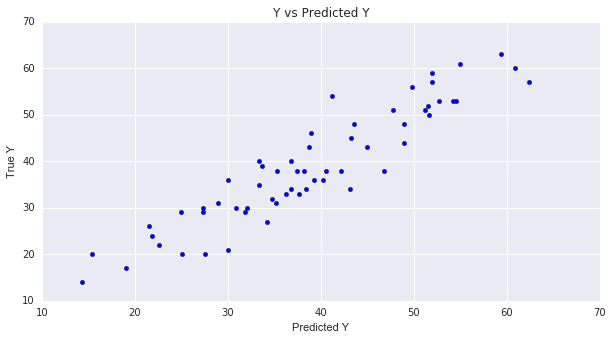

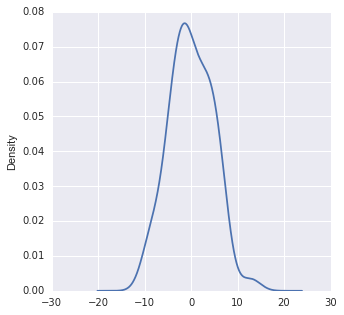

In [452]:
# the residuals appear normally distributed

plt.figure(figsize=(10,5))
plt.scatter(est.predict(X), y)
plt.title("Y vs Predicted Y")
plt.ylabel('True Y')
plt.xlabel('Predicted Y')
plt.show()

residuals = y - est.predict(X)
residuals.plot(kind="density",
              figsize=(5,5))

In [453]:
from sklearn import linear_model, metrics
%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [454]:
lm = linear_model.LinearRegression().fit(X, y)
print "~~~ OLS ~~~"
print 'OLS MSE: ', metrics.mean_squared_error(y, lm.predict(X))
print 'OLS R2:', lm.score(X, y)

lm = linear_model.Lasso().fit(X, y)
print "~~~ Lasso ~~~"
print 'Lasso MSE: ', metrics.mean_squared_error(y, lm.predict(X))
print 'Lasso R2:', lm.score(X, y)

lm = linear_model.Ridge().fit(X, y)
print "~~~ Ridge ~~~"
print 'Ridge MSE: ', metrics.mean_squared_error(y, lm.predict(X))
print 'Ridge R2:', lm.score(X, y)

~~~ OLS ~~~
OLS MSE:  20.8905342686
OLS R2: 0.859789935816
~~~ Lasso ~~~
Lasso MSE:  21.3793796732
Lasso R2: 0.856508973986
~~~ Ridge ~~~
Ridge MSE:  20.9231937756
Ridge R2: 0.859570736464


In [455]:
alphas = np.logspace(-10, 10, 21)
for a in alphas:
    print 'Alpha:', a
    lm = linear_model.Lasso(alpha=a)
    lm.fit(X, y)
    print lm.coef_
    print metrics.mean_squared_error(y, lm.predict(X))

Alpha: 1e-10
[  0.00000000e+00  -2.15359542e-02   3.22738757e+00  -2.41396807e-02
   5.13580933e-02  -4.46541980e-01  -1.24826118e-01   1.22091129e-01
  -3.83250248e-01   2.23747243e-01   4.25043778e-02   1.20456032e-01
  -1.44175523e-01   1.55356337e-01   3.14153377e-02   6.33703872e-01
   5.04165174e-01  -2.57022213e-04  -9.81441994e-01]
20.8905342686
Alpha: 1e-09
[  0.00000000e+00  -2.15359559e-02   3.22738741e+00  -2.41396815e-02
   5.13580935e-02  -4.46541979e-01  -1.24826118e-01   1.22091128e-01
  -3.83250247e-01   2.23747244e-01   4.25043778e-02   1.20456032e-01
  -1.44175525e-01   1.55356337e-01   3.14153378e-02   6.33703872e-01
   5.04165174e-01  -2.57022202e-04  -9.81441992e-01]
20.8905342686
Alpha: 1e-08
[  0.00000000e+00  -2.15359725e-02   3.22738575e+00  -2.41396894e-02
   5.13580953e-02  -4.46541969e-01  -1.24826112e-01   1.22091120e-01
  -3.83250236e-01   2.23747253e-01   4.25043782e-02   1.20456037e-01
  -1.44175543e-01   1.55356330e-01   3.14153394e-02   6.33703872e-01

In [456]:
from sklearn import grid_search

alphas = np.logspace(-10, 10, 21)
gs = grid_search.GridSearchCV(
    estimator=linear_model.Lasso(),
    param_grid={'alpha': alphas,'fit_intercept':[True,False],'normalize':[True,False]},
    scoring='mean_squared_error')

gs.fit(X, y)

GridSearchCV(cv=None, error_score='raise',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'normalize': [True, False], 'alpha': array([  1.00000e-10,   1.00000e-09,   1.00000e-08,   1.00000e-07,
         1.00000e-06,   1.00000e-05,   1.00000e-04,   1.00000e-03,
         1.00000e-02,   1.00000e-01,   1.00000e+00,   1.00000e+01,
         1.00000e+02,   1.00000e+03,   1.00000e+04,   1.00000e+05,
         1.00000e+06,   1.00000e+07,   1.00000e+08,   1.00000e+09,
         1.00000e+10]), 'fit_intercept': [True, False]},
       pre_dispatch='2*n_jobs', refit=True, scoring='mean_squared_error',
       verbose=0)

In [457]:
X.columns

Index([u'const', u'Unemployment', u'TrumpSupport', u'Smoking',
       u'Self_rep_health', u'Rent_burden', u'Racewhite_Rate', u'Poverty',
       u'Obesity', u'Ltd_Eng_Prof', u'Jailincarceration', u'Insurance', u'IMR',
       u'Housing_Defects', u'Fruit_Veg', u'Flu_Vaccination',
       u'Edudidnotcompletehs_rate', u'Drug_Hosp', u'Age0to17_rate'],
      dtype='object')

In [458]:
gs.best_estimator_.fit(X,y).coef_

array([  0.00000000e+00,  -0.00000000e+00,  -0.00000000e+00,
         0.00000000e+00,   7.00600244e-02,  -2.73986204e-01,
        -8.18616416e-02,   2.52073563e-03,  -3.42951512e-01,
         2.53971709e-01,   4.38699685e-02,   6.50337703e-02,
        -0.00000000e+00,   1.97934004e-01,   1.95384423e-01,
         6.51461762e-01,   4.96253931e-01,   3.47373266e-04,
        -8.82646908e-01])

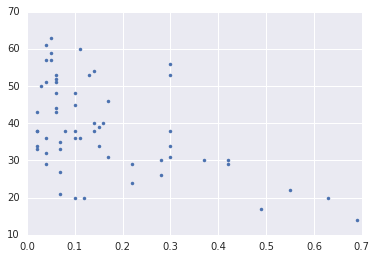

In [459]:
import seaborn as sns
sns.set_style("darkgrid")
import statsmodels.formula.api as smf

# create a matplotlib figure
plt.figure()
# generate a scatterplot inside the figure
plt.plot(data.TrumpSupport,data.HPV_vaccination, '.')
# show the plot
plt.show()

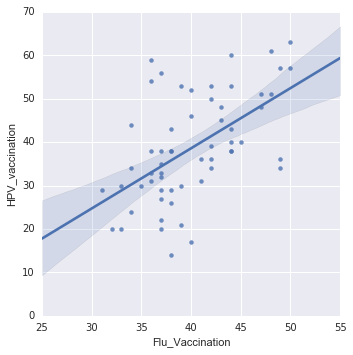

In [505]:
sns.lmplot('Flu_Vaccination', 'HPV_vaccination', data)

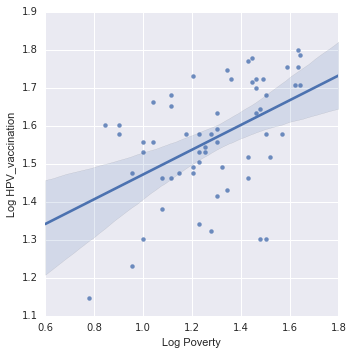

In [461]:
log_columns = ['Poverty', 'HPV_vaccination',]
log_data = data.copy()
log_data[log_columns] = log_data[log_columns].apply(np.log10)
g = sns.lmplot('Poverty', 'HPV_vaccination', log_data)
g.set_axis_labels( "Log Poverty", "Log HPV_vaccination")

                                HPV_vaccination  Unemployment  TrumpSupport  \
HPV_vaccination                        1.000000      0.352816     -0.514131   
Unemployment                           0.352816      1.000000     -0.487870   
TrumpSupport                          -0.514131     -0.487870      1.000000   
Tobaccoretail_rate                     0.280829     -0.035278     -0.259127   
Teen_Births                            0.497002      0.823331     -0.415560   
Supermarketarea_rate                  -0.100728     -0.251694      0.116805   
Sugary_Drink                           0.242926      0.817164     -0.305203   
Stroke_Hosp                            0.113197      0.804416     -0.416899   
Smoking                               -0.070338      0.198859      0.084083   
Self_rep_health                       -0.389013     -0.591853      0.086322   
Schoolabsent_rate                      0.249945      0.846833     -0.474521   
Rent_burden                            0.196921     

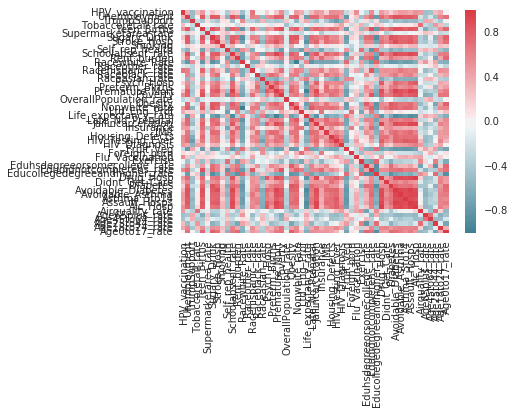

In [513]:
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# correlations = data[['HPV_vaccination','Unemployment','TrumpSupport','Smoking',
#       'Self_rep_health','Rent_burden',
#       'Racewhite_Rate','Poverty','Obesity',
#       'Ltd_Eng_Prof','Jailincarceration','Insurance','IMR','Housing_Defects',
#       'HIV_Diagnosis','Fruit_Veg','Flu_Vaccination',
#       'Eduhsdegreeorsomecollege_rate',
#       'Edudidnotcompletehs_rate',
#       'Drug_Hosp','Airquality_rate','Age65plus_rate']].corr()

correlations = all_data.corr()
print correlations
print sns.heatmap(correlations, cmap=cmap)

In [463]:
# Normalize the Data

def normalize_features(X):
    norms = np.linalg.norm(X, axis=0)
    normalized_features = X / norms
    return(normalized_features)

X_norm = normalize_features(X)
y_norm = normalize_features(y)

In [464]:
import statsmodels.formula.api as sm

X_log = np.log(X)
y_log = np.log(y)
est = sm.OLS(y_log,X_log).fit()
est.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        HPV_vaccination   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     1758.
Date:                Mon, 05 Dec 2016   Prob (F-statistic):           2.27e-53
Time:                        16:57:14   Log-Likelihood:                 36.568
No. Observations:                  59   AIC:                            -37.14
Df Residuals:                      41   BIC:                            0.2605
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------------
const                             0          0        nan        nan             0         0
Unemployment                 0.0439      0.180      0.244      0.809        -0.319     0.407
TrumpSupport                -0.0384      0.043     -0.884      0.382        -0.126     0.049
Smoking                      0.0871      0.172      0.507      0.615        -0.260     0.434
Self_rep_health              0.2409      0.418      0.577      0.567        -0.603     1.085
Rent_burden                 -0.8184      0.379     -2.159      0.037        -1.584    -0.053
Racewhite_Rate              -0.0831      0.034     -2.466      0.018        -0.151    -0.015
Poverty                     -0.0926      0.167     -0.553      0.583        -0.430     0.245
Obesity                     -0.1822      0.176     -1.035      0.307        -0.538     0.173
Ltd_Eng_Prof                 0.1993      0.105      1.901      0.064        -0.012     0.411
Jailincarceration            0.1326      0.055      2.397      0.021         0.021     0.244
Insurance                    0.2118      0.158      1.338      0.188        -0.108     0.532
IMR                         -0.0880      0.074     -1.185      0.243        -0.238     0.062
Housing_Defects              0.3068      0.157      1.954      0.058        -0.010     0.624
Fruit_Veg                    0.3419      0.425      0.804      0.426        -0.517     1.201
Flu_Vaccination              0.8723      0.237      3.678      0.001         0.393     1.351
Edudidnotcompletehs_rate     0.1669      0.118      1.412      0.166        -0.072     0.406
Drug_Hosp                   -0.0406      0.087     -0.464      0.645        -0.217     0.136
Age0to17_rate               -0.4648      0.162     -2.868      0.006        -0.792    -0.138
==============================================================================
Omnibus:                        3.362   Durbin-Watson:                   2.171
Prob(Omnibus):                  0.186   Jarque-Bera (JB):                2.433
Skew:                          -0.377   Prob(JB):                        0.296
Kurtosis:                       3.649   Cond. No.                          inf
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is      0. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

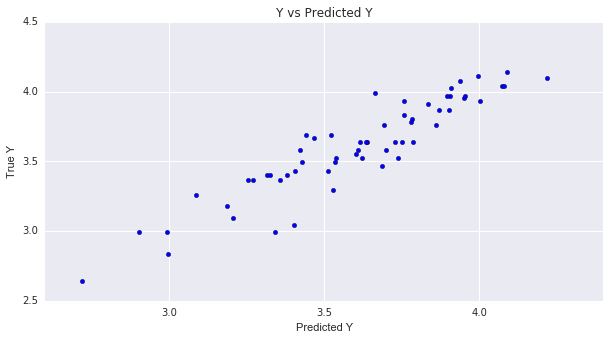

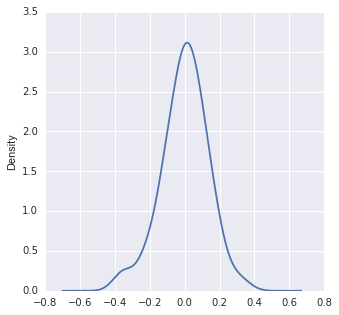

In [465]:
# the residuals appear normally distributed

plt.figure(figsize=(10,5))
plt.scatter(est.predict(X_log), y_log)
plt.title("Y vs Predicted Y")
plt.ylabel('True Y')
plt.xlabel('Predicted Y')
plt.show()

residuals = y_log - est.predict(X_log)
residuals.plot(kind="density",
              figsize=(5,5))

In [466]:
# Test single variables

Trump_log = np.log(X['TrumpSupport'])

est = sm.OLS(y,Trump_log).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        HPV_vaccination   R-squared:                       0.865
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     370.1
Date:                Mon, 05 Dec 2016   Prob (F-statistic):           7.49e-27
Time:                        16:57:16   Log-Likelihood:                -243.33
No. Observations:                  59   AIC:                             488.7
Df Residuals:                      58   BIC:                             490.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
TrumpSupport   -15.4656      0.804    -19.237      0.000       -17.075   -13.856
==============================================================================
Omnibus:                        1.346   Durbin-Watson:                   1.327
Prob(Omnibus):                  0.510   Jarque-Bera (JB):                1.234
Skew:                          -0.343   Prob(JB):                        0.540
Kurtosis:                       2.820   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [468]:
features.shape

(59, 53)

In [469]:
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel
lsvc = LinearSVC(C=0.01, penalty="l1", dual=False).fit(features, y)
model = SelectFromModel(lsvc, prefit=True)
features_new = model.transform(features)
features_new.shape

(59, 23)

In [478]:
lsvc

LinearSVC(C=0.01, class_weight=None, dual=False, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l1', random_state=None, tol=0.0001,
     verbose=0)

In [405]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

def pretty_print_linear(coefs, names = None, sort = False):
    if names == None:
        names = ["X%s" % x for x in range(len(coefs))]
    lst = zip(coefs, names)
    if sort:
        lst = sorted(lst,  key = lambda x:-np.abs(x[0]))
    return " + ".join("%s * %s" % (round(coef, 3), name)
                                   for coef, name in lst)
 
print "Linear model:", pretty_print_linear(lr.coef_)

Linear model:

AttributeError: 'LinearRegression' object has no attribute 'coef_'

In [598]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
  
names = features.columns

#use linear regression as the model
lr = LinearRegression()
#rank all features, i.e continue the elimination until the last one
rfe = RFE(lr, n_features_to_select=10)
rfe.fit(features,y)

print "Features sorted by their rank:"
print sorted(zip(map(lambda x: round(x, 4), rfe.ranking_), names))

Features sorted by their rank:
[(1.0, 'Age25to44_rate'), (1.0, 'Age45to64_rate'), (1.0, 'Airquality_rate'), (1.0, 'Educollegedegreeandhigher_rate'), (1.0, 'Eduhsdegreeorsomecollege_rate'), (1.0, 'Flu_Vaccination'), (1.0, 'Late_No_Prenatal'), (1.0, 'Poverty'), (1.0, 'Preterm_Births'), (1.0, 'TrumpSupport'), (2.0, 'Sugary_Drink'), (3.0, 'Racewhite_Rate'), (4.0, 'HIV_Testing_Ever'), (5.0, 'Raceasian_rate'), (6.0, 'Smoking'), (7.0, 'Raceother_rate'), (8.0, 'Exercise'), (9.0, 'Age0to17_rate'), (10.0, 'Rent_burden'), (11.0, 'Foreign_born'), (12.0, 'Insurance'), (13.0, 'Age65plus_rate'), (14.0, 'Life_expectancy_rate'), (15.0, 'Nonwhite_rate'), (16.0, 'Edudidnotcompletehs_rate'), (17.0, 'Teen_Births'), (18.0, 'Raceblack_rate'), (19.0, 'Unemployment'), (20.0, 'Schoolabsent_rate'), (21.0, 'Housing_Defects'), (22.0, 'Age18to24_rate'), (23.0, 'Diabetes'), (24.0, 'Obesity'), (25.0, 'Assault_Hosps'), (26.0, 'Jailincarceration'), (27.0, 'Fruit_Veg'), (28.0, 'Racehispanic_rate'), (29.0, 'Self_rep_heal

In [501]:
lasso = linear_model.Lasso().fit(features, y)
print "~~~ Lasso ~~~"
print 'Lasso MSE: ', metrics.mean_squared_error(y, lasso.predict(features))
print 'Lasso R2:', lasso.score(features, y)
print lasso.coef_ 

names = features.columns

print "Features sorted by their Coefficient:"
print sorted(zip(map(lambda x: round(x, 3), lasso.coef_), names))

~~~ Lasso ~~~
Lasso MSE:  10.4190738463
Lasso R2: 0.930070768227
[ -0.00000000e+00   0.00000000e+00   5.96298727e-02   1.79133997e-01
   1.20164112e-02  -1.27345659e-01  -2.55815396e-02   0.00000000e+00
  -0.00000000e+00  -0.00000000e+00  -3.74231538e-01  -1.73472194e-01
   0.00000000e+00   1.37406591e-01  -0.00000000e+00   7.67097152e-02
  -9.84459572e-03   5.61818193e-02  -1.43869793e-02  -0.00000000e+00
  -3.37012739e-06  -0.00000000e+00   1.96185423e-02   1.41600568e-02
   0.00000000e+00   0.00000000e+00   5.94999051e-02  -0.00000000e+00
   0.00000000e+00   4.91071626e-02   0.00000000e+00   2.47871225e-02
   0.00000000e+00   1.98012676e-01   1.19365883e-01   7.62288992e-02
  -3.17229651e-01   2.04951290e-01   0.00000000e+00   4.03053213e-03
  -0.00000000e+00  -0.00000000e+00  -6.93843352e-03  -7.08268286e-03
  -6.27350213e-03  -9.12390190e-02   9.43925459e-03   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00  -0.00000000e+00
  -1.40648346e-01]
Features sorted by 

In [555]:
from sklearn import grid_search

alphas = np.logspace(-10, 10, 21)
gs = grid_search.GridSearchCV(
    estimator=linear_model.Lasso(),
    param_grid={'alpha': alphas},
    scoring='r2')

gs.fit(features, y)

print gs.fit
print gs.best_score_
print gs.best_estimator_

<bound method GridSearchCV.fit of GridSearchCV(cv=None, error_score='raise',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'alpha': array([  1.00000e-10,   1.00000e-09,   1.00000e-08,   1.00000e-07,
         1.00000e-06,   1.00000e-05,   1.00000e-04,   1.00000e-03,
         1.00000e-02,   1.00000e-01,   1.00000e+00,   1.00000e+01,
         1.00000e+02,   1.00000e+03,   1.00000e+04,   1.00000e+05,
         1.00000e+06,   1.00000e+07,   1.00000e+08,   1.00000e+09,
         1.00000e+10])},
       pre_dispatch='2*n_jobs', refit=True, scoring='r2', verbose=0)>
0.261381742898
Lasso(alpha=10.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)


In [566]:
from sklearn import grid_search

alphas = np.logspace(-20, 20, 21)
gs = grid_search.GridSearchCV(
    estimator=linear_model.Lasso(),
    param_grid={'alpha': alphas},
    scoring='r2')

gs.fit(feature_set, y)

print gs.fit
print gs.best_score_
print gs.best_estimator_
print gs.grid_scores_ 

<bound method GridSearchCV.fit of GridSearchCV(cv=None, error_score='raise',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'alpha': array([  1.00000e-20,   1.00000e-18,   1.00000e-16,   1.00000e-14,
         1.00000e-12,   1.00000e-10,   1.00000e-08,   1.00000e-06,
         1.00000e-04,   1.00000e-02,   1.00000e+00,   1.00000e+02,
         1.00000e+04,   1.00000e+06,   1.00000e+08,   1.00000e+10,
         1.00000e+12,   1.00000e+14,   1.00000e+16,   1.00000e+18,
         1.00000e+20])},
       pre_dispatch='2*n_jobs', refit=True, scoring='r2', verbose=0)>
0.250524584021
Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)
[mean: -

P Values: [  6.12923983e-03   3.11120447e-05   3.12010428e-02   6.22388955e-05
   4.47799878e-01   6.37527722e-02   3.93309699e-01   5.96546395e-01
   2.32636928e-03   5.62353914e-02   1.34942447e-01   1.11848214e-04
   3.58218679e-01   3.04157289e-09   6.12368645e-01   7.98603104e-01
   1.40515281e-01   9.98076715e-01   5.72986782e-02   8.72895114e-06
   3.03271248e-02   7.08068752e-01   1.11848214e-04   2.33287998e-03
   1.66300524e-01   2.01116279e-02   6.40384137e-05   4.95504796e-04
   1.85892171e-01   5.71446064e-06   1.22688618e-05   7.02898202e-05
   3.69177901e-02   3.29599359e-01   5.89521734e-06   6.23698602e-01
   2.86716090e-02   6.18405791e-06   2.73530515e-01   1.24990230e-04
   8.18963611e-03   1.58421843e-01   5.53522898e-03   1.38739149e-04
   2.06347579e-04   1.75894532e-03   2.87082658e-05   1.58407327e-04
   2.37959333e-04   4.22376504e-04   2.33917232e-02   1.51249438e-03
   9.69173739e-01]
Coefficients: [ -0.00000000e+00  -0.00000000e+00   0.00000000e+00   0.0000

Lasso(alpha=10, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

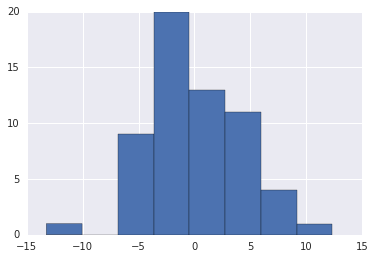

In [586]:
from sklearn import feature_selection, linear_model

def get_linear_model_metrics(features, y, algo):
    # get the pvalue of X given y. Ignore f-stat for now.
    pvals = feature_selection.f_regression(features, y)[1]
    # start with an empty linear regression object
    # .fit() runs the linear regression function on X and y
    algo.fit(features,y)
    residuals = (y-algo.predict(features)).values

    # print the necessary values
    print 'P Values:', pvals
    print 'Coefficients:', algo.coef_
    print 'y-intercept:', algo.intercept_
    print 'R-Squared:', algo.score(features,y)
    plt.figure()
    plt.hist(residuals, bins=np.ceil(np.sqrt(len(y))))
#     keep the model
    return algo

get_linear_model_metrics(features, y, linear_model.Lasso(alpha=10))

In [585]:
from sklearn import grid_search

alphas = np.logspace(-20, 20, 21)
gs = grid_search.GridSearchCV(
    estimator=linear_model.Lasso(),
    param_grid={'alpha': alphas},
    scoring='r2')

gs.fit(features, y)

print gs.fit
print gs.best_score_
print gs.best_estimator_
print gs.grid_scores_ 

<bound method GridSearchCV.fit of GridSearchCV(cv=None, error_score='raise',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'alpha': array([  1.00000e-20,   1.00000e-18,   1.00000e-16,   1.00000e-14,
         1.00000e-12,   1.00000e-10,   1.00000e-08,   1.00000e-06,
         1.00000e-04,   1.00000e-02,   1.00000e+00,   1.00000e+02,
         1.00000e+04,   1.00000e+06,   1.00000e+08,   1.00000e+10,
         1.00000e+12,   1.00000e+14,   1.00000e+16,   1.00000e+18,
         1.00000e+20])},
       pre_dispatch='2*n_jobs', refit=True, scoring='r2', verbose=0)>
0.209639222422
Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)
[mean: -

In [593]:
rf = RandomForestRegressor(max_features=6)
rf.fit(features,y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=6, max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)